# Quantifying Orchard Resilience

## General description on waters stress sensitivities during growing season
Almond trees are deep-rooted and moderately drought-tolerant compared to other fruit trees. However, to reach their full productive potential and maintain nut quality, they require sufficient and well-timed water throughout their growth cycle. The water demand of almond trees varies across the year, corresponding to distinct phenological stages:

1. Dormancy (Winter: December–February)
* Water demand is minimal.
* Trees are less vulnerable to water stress, but adequate soil moisture is needed to support root activity and prepare for bud break.

2. Bud Break and Flowering (Late Winter–Early Spring: February–March)
* A critical stage for pollination and fruit set.
* Water stress during this period can reduce flower viability and pollination success, leading to poor fruit set and lower yields. 

3. Fruit Set and Nut Development (Spring: March–May)
* High sensitivity to water stress.
* Inadequate water supply can lead to increased nut drop, smaller nut size, and poor kernel quality.

4. Shell Hardening and Kernel Filling (Early Summer: May–July)
* Continued water supply is essential to support kernel development.
* Water deficits can reduce kernel weight and result in shriveled or underdeveloped almonds.

5. Maturation and Harvest (Late Summer: August–September)
* Water stress is less critical, and regulated deficit irrigation (RDI) may be applied to conserve water without severely impacting yield or quality.
* Over-irrigation at this stage can lead to delayed hull split and increased disease risk.

6. Post-Harvest (Autumn: September–November)
* Moderate irrigation supports carbohydrate accumulation and root regeneration.
* Water stress here can weaken trees and impair next season’s flowering potential.

## Water Stress in the Iberian Peninsula
The Iberian Peninsula faces increasing challenges from climate change, including:
* Rising temperatures and evapotranspiration rates.
* Reduced and erratic rainfall.
* Depleted aquifers and stricter water regulations.

These conditions intensify water stress during key growth stages, especially in rainfed almond orchards, which are common in Spain's interior and southern regions. In irrigated orchards, limited water availability demands precise irrigation scheduling and adoption of water-saving techniques like deficit irrigation and soil moisture monitoring.

Water stress significantly influences almond production in the Iberian Peninsula, affecting yield quantity and nut quality across the tree’s phenological stages. With the increasing frequency of drought and tightening water resources, effective irrigation management, cultivar selection, and adaptation strategies are essential for sustaining almond production in the region. Understanding the specific impact of water deficits at different times of the year is crucial for optimizing irrigation practices and ensuring long-term viability in the face of climatic and environmental challenges.

In this section we analyze soil moisture changes over the years during the growing season and delve into how we can benchmark fields with one another to create a basis to quantify resilience of almond orchards. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

# to pick it up fast where you left
sm_df = pd.read_csv(os.path.join('Data/soil_moisture','Soil_moisture_all.csv'), index_col=0, header=0)
sm_df.index = pd.to_datetime(sm_df.index)

print(sm_df.head())

                  sm  DOY  rolling_mean    sm_DOY  sm anomaly
time_bnds                                                    
1980-01-01       NaN    1           NaN  0.415186         NaN
1980-01-02       NaN    2           NaN  0.405549         NaN
1980-01-03  0.334001    3      0.334001  0.387955   -0.053953
1980-01-04       NaN    4      0.334001  0.395356   -0.061354
1980-01-05       NaN    5      0.334001  0.402172   -0.068171


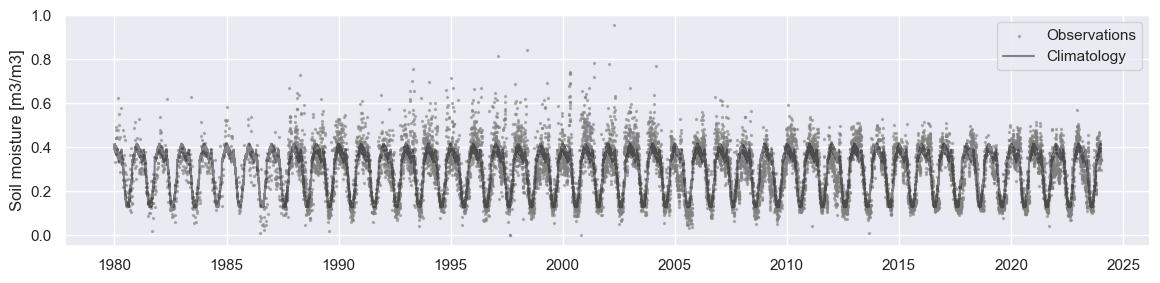

In [2]:
sns.set_theme()

fig, ax = plt.subplots(figsize=(14, 3))

plt.scatter(sm_df['sm'].index, sm_df['sm'].values, color='gray', s=2, alpha=0.5, label='Observations') 
plt.plot(sm_df['sm_DOY'].index, sm_df['sm_DOY'].values, color='k', alpha=0.5, label='Climatology')

plt.ylabel('Soil moisture [m3/m3]')
plt.legend(loc='upper right')
plt.savefig('soilmoistureALL.png', dpi=500)

plt.show()

C:\Users\ici-1\AppData\Local\Temp\ipykernel_14484\3362976196.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('bwr_r')  # blue-white-red


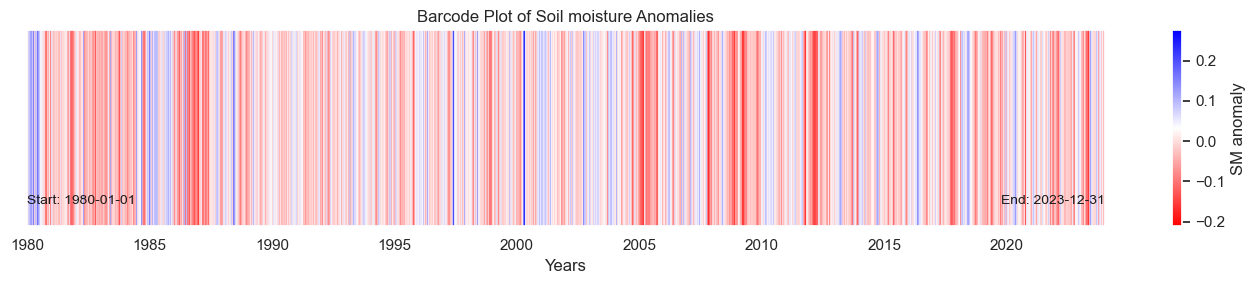

In [3]:
# Inspiration: https://showyourstripes.info/c/europe/portugal/lisbon

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm


# Prepare color mapping: red (-), white (0), blue (+)
norm = Normalize(vmin=sm_df['sm anomaly'].min(), vmax=sm_df['sm anomaly'].max())
cmap = cm.get_cmap('bwr_r')  # blue-white-red


fig, ax = plt.subplots(figsize=(14, 3))

# Create barcode plot
for i in sm_df.index:
    score = sm_df['sm anomaly'][i]
    ax.axvline(x=i, color=cmap(norm(score)), linewidth=1)


# Add start and end markers
start_label = f"Start: {sm_df.index[0].date()}"
end_label = f"End: {sm_df.index[-1].date()}"
ax.text(sm_df.index[0], 0.1, start_label, ha='left', va='bottom', fontsize=10, color='k', transform=ax.get_xaxis_transform())
ax.text(sm_df.index[-1], 0.1, end_label, ha='right', va='bottom', fontsize=10, color='k', transform=ax.get_xaxis_transform())


plt.title('Barcode Plot of Soil moisture Anomalies')
plt.yticks([])
plt.xlabel('Years')
plt.xlim(sm_df.index[0], sm_df.index[-1])


# Add colorbar with mappable
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # needed for colorbar
fig.colorbar(sm, ax=ax, orientation='vertical', label='SM anomaly')

plt.tight_layout()
plt.show()


In [4]:
# Filter dates for March to September
df_filtered = sm_df[sm_df.index.month.isin([3, 4, 5, 6, 7, 8, 9])]

# days of positive and negative anomalies and changes through years in growing season
negative_anomalies = df_filtered[(df_filtered['sm anomaly'] < 0)]
positive_anomalies = df_filtered[(df_filtered['sm anomaly'] > 0)]

# Count the number of days for each year with positive anomalies
positive_counts = positive_anomalies.groupby(positive_anomalies.index.year).size()

# Count the number of days for each year with negative anomalies
negative_counts = negative_anomalies.groupby(negative_anomalies.index.year).size()

print(positive_anomalies.head())

            sm  DOY  rolling_mean    sm_DOY  sm anomaly
time_bnds                                              
1980-03-01 NaN   61      0.480711  0.355352    0.125358
1980-03-02 NaN   62      0.480711  0.355644    0.125066
1980-03-03 NaN   63      0.408572  0.351542    0.057030
1980-03-04 NaN   64      0.477351  0.355633    0.121718
1980-03-05 NaN   65      0.477351  0.348972    0.128379


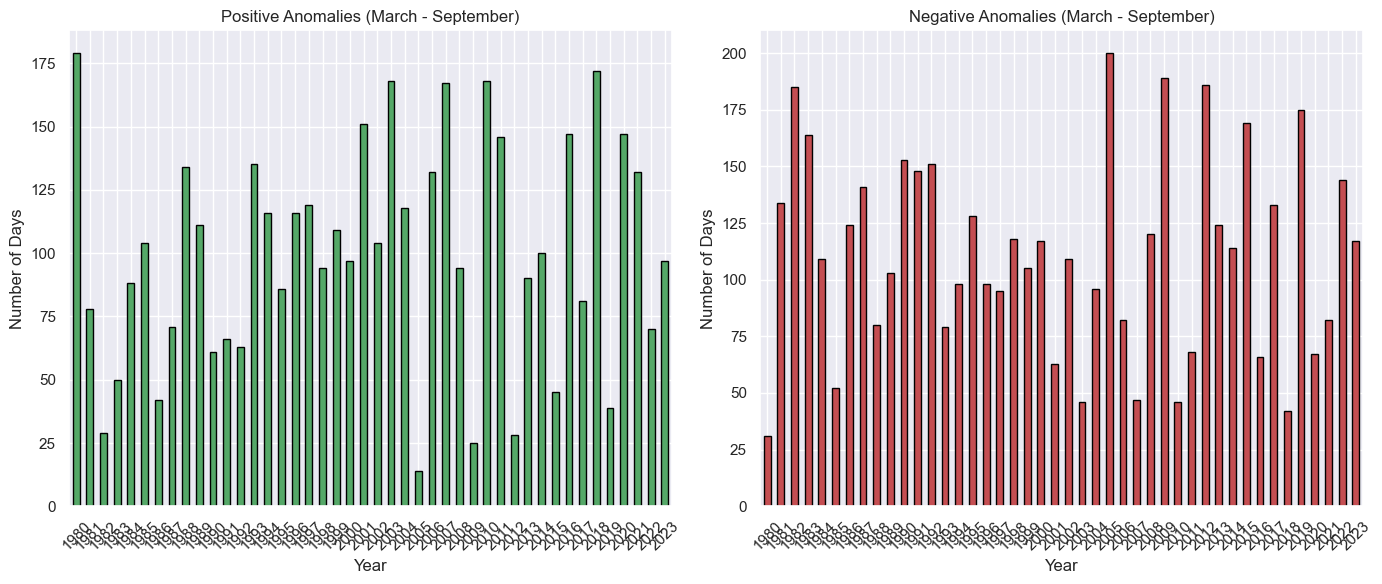

In [5]:
from scipy.stats import linregress

# Calculate summary statistics for positive anomalies
positive_mean = positive_counts.mean()
positive_std = positive_counts.std()
positive_slope, positive_intercept, positive_r_value, positive_p_value, positive_std_err = linregress(positive_counts.index, positive_counts)

# Calculate summary statistics for negative anomalies
negative_mean = negative_counts.mean()
negative_std = negative_counts.std()
negative_slope, negative_intercept, negative_r_value, negative_p_value, negative_std_err = linregress(negative_counts.index, negative_counts)

# Prepare the figure for barplots
plt.figure(figsize=(14, 6))

# Bar plot for positive anomalies
plt.subplot(1, 2, 1)
positive_counts.plot(kind='bar', color='g', edgecolor='black')
plt.title(f'Positive Anomalies (March - September)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)

# Bar plot for negative anomalies
plt.subplot(1, 2, 2)
negative_counts.plot(kind='bar', color='r', edgecolor='black')
plt.title(f'Negative Anomalies (March - September)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


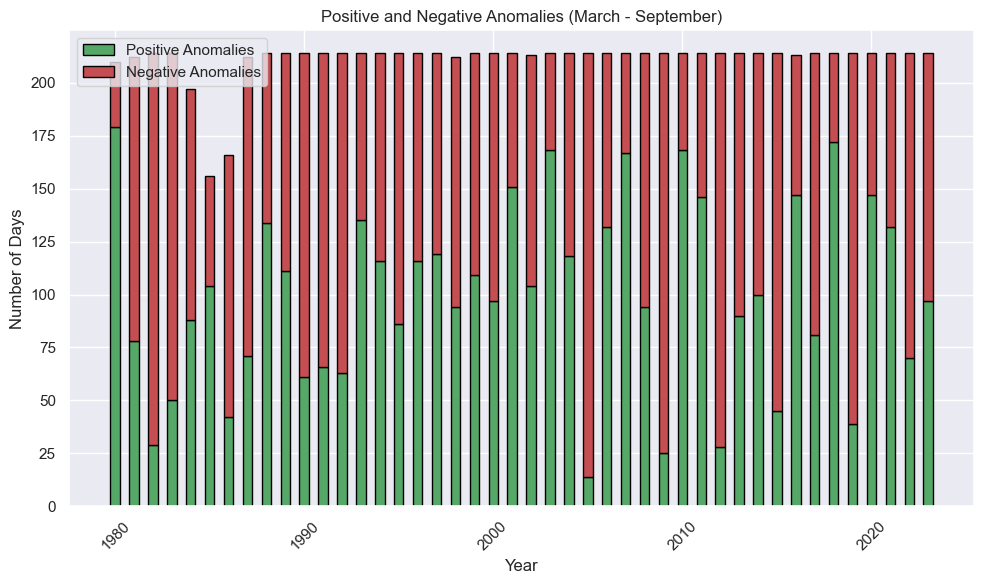

In [6]:
# Prepare the figure for the combined bar plot
plt.figure(figsize=(10, 6))

# Bar plot for both positive and negative anomalies, stacked
bar_width = 0.5  # width of the bars
plt.bar(positive_counts.index, positive_counts, width=bar_width, color='g', label='Positive Anomalies', edgecolor='black')
plt.bar(negative_counts.index, negative_counts, width=bar_width, bottom=positive_counts, color='r', label='Negative Anomalies', edgecolor='black')

# Titles and labels
plt.title(f'Positive and Negative Anomalies (March - September)')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

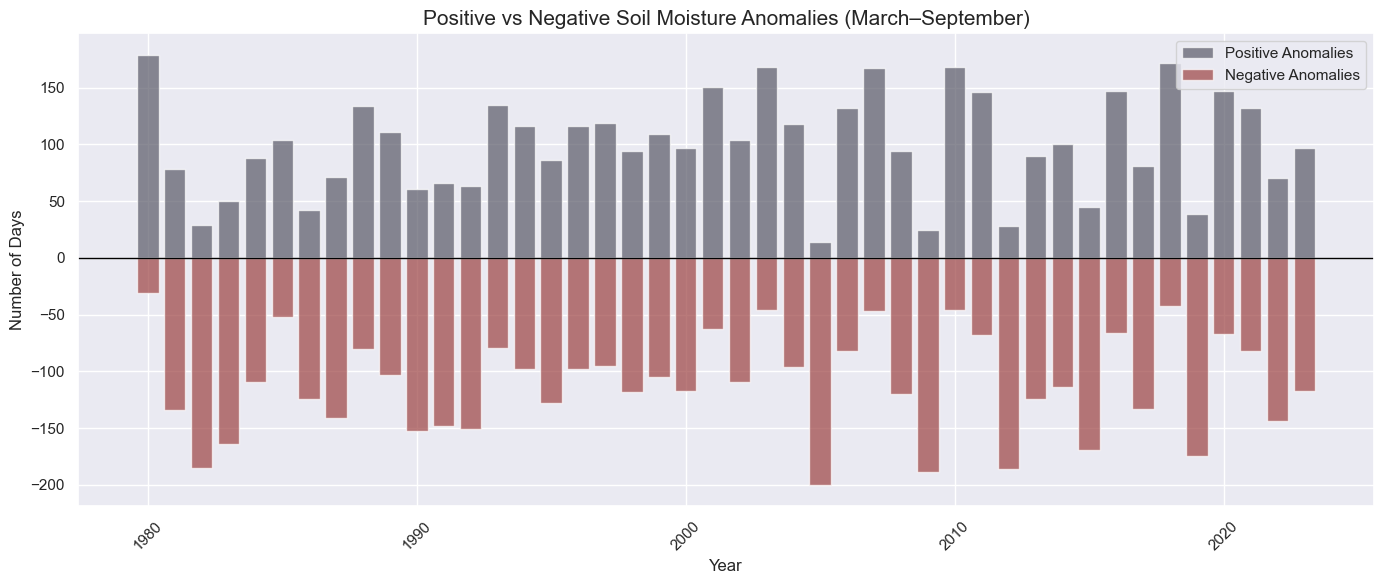

In [13]:
# Vis alternative anomaly calculation:

years = positive_counts.index
pos = positive_counts.values
neg = -negative_counts.values  # Negative values go downward

plt.figure(figsize=(14, 6))

plt.bar(years, pos, color="#595967", label="Positive Anomalies", alpha=0.7)
plt.bar(years, neg, color="#9C4242", label="Negative Anomalies", alpha=0.7)

plt.axhline(0, color="black", linewidth=1)

plt.title("Positive vs Negative Soil Moisture Anomalies (March–September)", fontsize=15)
plt.ylabel("Number of Days")
plt.xlabel("Year")
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

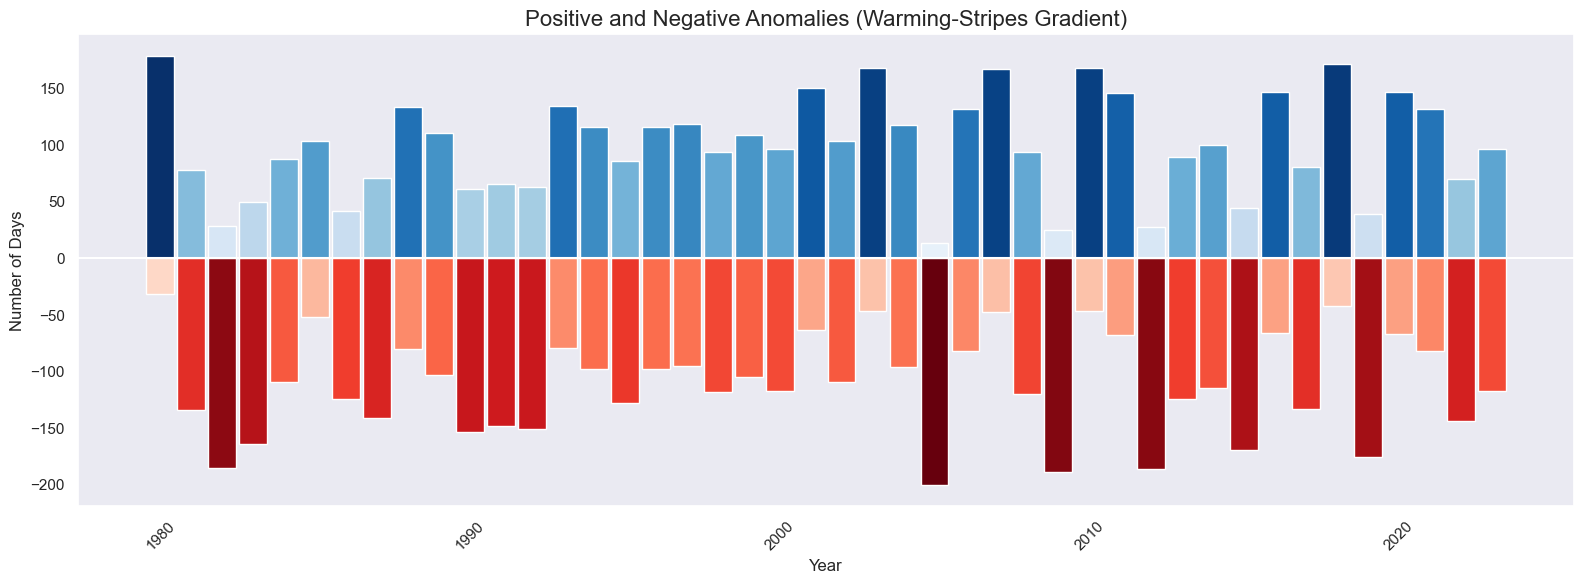

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

years = positive_counts.index
pos = positive_counts.values
neg = negative_counts.values

# Normalizers for color intensity
pos_norm = Normalize(vmin=0, vmax=pos.max())
neg_norm = Normalize(vmin=0, vmax=neg.max())

# Choose good warming/cooling stripe colormaps
pos_cmap = plt.cm.Blues  # light blue → dark blue (reverse for darker down)
neg_cmap = plt.cm.Reds     # light red → dark red

plt.figure(figsize=(16, 6))

for y, p, n in zip(years, pos, neg):

    # Positive bar (above zero)
    plt.bar(y, p,
            color=pos_cmap(pos_norm(p)),
            width=0.9)

    # Negative bar (below zero)
    plt.bar(y, -n,
            color=neg_cmap(neg_norm(n)),
            width=0.9)

# Zero reference line
plt.axhline(0, color="white", linewidth=1.5)

plt.title("Positive and Negative Anomalies (Warming-Stripes Gradient)", fontsize=16)
plt.ylabel("Number of Days")
plt.xlabel("Year")
plt.xticks(rotation=45)

plt.grid(False)
plt.tight_layout()
plt.show()


#### On long term soil moisture records
Interesting to see in the above figures that there is a more erratic behavior of soil moisture in the area during March-September. Extreme drought events seem to happen more often than before. Maybe interesting to also look at occurence of consecutive days of negative anomalies (e.g. barely any rainfall for longer periods during the season). Below we will continue a bit with visualizing the timeseries, in order to detect certain periods in the year with negative soil moisture anomalies.

In [7]:
last_few_years = sm_df['2017-01-01':'2023-12-31']

Text(0, 0.5, 'Soil moisture [m3/m3]')

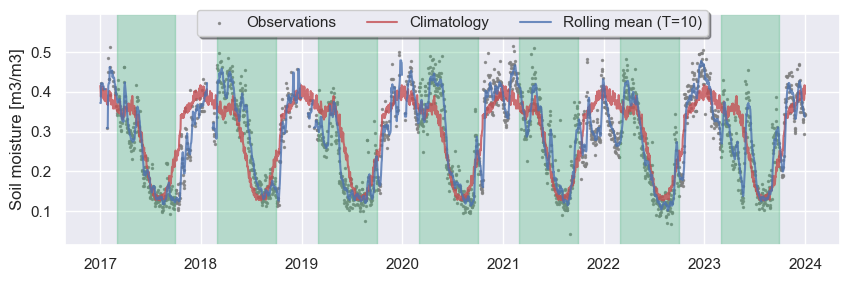

In [8]:
# last five years

sns.set_theme()

fig, ax = plt.subplots(figsize=(10, 3))

plt.scatter(last_few_years['sm'].index, last_few_years['sm'].values, color='gray', s=2, alpha=0.8, label='Observations') 
plt.plot(last_few_years['sm_DOY'].index, last_few_years['sm_DOY'].values, color='r', alpha=0.8, label='Climatology')
plt.plot(last_few_years['rolling_mean'].index, last_few_years['rolling_mean'].values, color='b', alpha=0.8, label='Rolling mean (T=10)')

# Loop through each year and color the background for March to September
for year in range(last_few_years.index.year.min(), last_few_years.index.year.max() + 1):
    start_date = pd.Timestamp(f'{year}-03-01')  # March 1st of the year
    end_date = pd.Timestamp(f'{year}-09-30')   # September 30th of the year
    ax.axvspan(start_date, end_date, color='mediumseagreen', alpha=0.3)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

plt.ylabel('Soil moisture [m3/m3]')
#plt.legend(loc='upper left')

The above figure displays the soil moisture development over the last years. The green shaded area are the months March until mid september, which is the assumed growing season for Almonds. The red line displays the climatology (average on a certain Day of the year for all datapoints on that day available in the dataset), the gray dots are the observations and the blue line is a rolling mean with a window of ten days. In 2023 we see a clear drought at the beginning of the growing season. 2022 shows a huge water deficit in the winter season, which may have significantly affected recharge of the water reservoirs. Whereas 2020 shows, for example, above average wet year at the beginning of the growing season.

1) 2023 beginning of the growing season seems to be a real drought year. Observe this in the vegetation timeseries
2) Identify together with partners which period is vital for the almond orchards in order to correctly quantify orchard resilience
3) Difficulty to ingest NRT high resolution soil moisture data (SMAP, SMOS)

In [9]:
# Path to the folder containing your CSVs
folder_path = r'Data/regen_farms'

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

print(csv_files)

['NDVI_TimeSeries_PerFeature_Antinha.csv', 'NDVI_TimeSeries_PerFeature_Carrascalao.csv', 'NDVI_TimeSeries_PerFeature_ext.csv', 'NDVI_TimeSeries_PerFeature_RU.csv', 'NDWI_TimeSeries_PerFeature_Antinha.csv', 'NDWI_TimeSeries_PerFeature_Carrascalao.csv', 'NDWI_TimeSeries_PerFeature_ext.csv', 'NDWI_TimeSeries_PerFeature_RU.csv']


In [10]:
# Group files by location (assuming location is between the 'NDVI_TimeSeries_PerFeature_' and '.csv')
location_groups = {}

# Loop through all CSV files to group them by location name
for csv_file in csv_files:
    # Extract the location name by removing the "NDVI_TimeSeries_PerFeature_" prefix and ".csv" suffix
    if 'NDVI' in csv_file:
        location_name = csv_file.replace('NDVI_TimeSeries_PerFeature_', '').replace('.csv', '')
    elif 'NDWI' in csv_file:
        location_name = csv_file.replace('NDWI_TimeSeries_PerFeature_', '').replace('.csv', '')
    
    # Initialize a dictionary for the location if it's not already in the dictionary
    if location_name not in location_groups:
        location_groups[location_name] = {'NDVI': None, 'NDWI': None}
    
    # Assign the file to the correct type (NDVI or NDWI)
    if 'NDVI' in csv_file:
        location_groups[location_name]['NDVI'] = csv_file
    elif 'NDWI' in csv_file:
        location_groups[location_name]['NDWI'] = csv_file

location_groups

{'Antinha': {'NDVI': 'NDVI_TimeSeries_PerFeature_Antinha.csv',
  'NDWI': 'NDWI_TimeSeries_PerFeature_Antinha.csv'},
 'Carrascalao': {'NDVI': 'NDVI_TimeSeries_PerFeature_Carrascalao.csv',
  'NDWI': 'NDWI_TimeSeries_PerFeature_Carrascalao.csv'},
 'ext': {'NDVI': 'NDVI_TimeSeries_PerFeature_ext.csv',
  'NDWI': 'NDWI_TimeSeries_PerFeature_ext.csv'},
 'RU': {'NDVI': 'NDVI_TimeSeries_PerFeature_RU.csv',
  'NDWI': 'NDWI_TimeSeries_PerFeature_RU.csv'}}

Keep in mind - Info of the case studies of Arbo-Innova:
* Carrascalao - 7.3 ha - Olive orchard
* RU Fortes - 11 ha - recently planted (2023), formerly pasture - preparation required leveling and the heavy machinery resulted in poor drainage 
* Monte Silveira - 6.5 ha - recently planted (2023)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

def plot_regression_line(df, ax, color, label, y_offset, poly_order=1):
    x = df['NDVI_mean'].values.reshape(-1, 1)
    y = df['NDWI_mean'].values

    # Fit model
    if poly_order == 1:
        model = LinearRegression()
        model.fit(x, y)
        x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
        y_pred = model.predict(x_range)
        y_fit = model.predict(x)
        # Equation and R^2
        slope = model.coef_[0]
        intercept = model.intercept_
        equation = f"{label}:\nNDWI = {slope:.2f}·NDVI + {intercept:.2f}"
    elif poly_order == 2:
        # Create polynomial features manually
        x_poly = np.hstack([x, x**2])
        model = LinearRegression()
        model.fit(x_poly, y)
        x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
        x_range_poly = np.hstack([x_range, x_range**2])
        y_pred = model.predict(x_range_poly)
        y_fit = model.predict(x_poly)
        # Equation and R^2
        a, b = model.coef_
        c = model.intercept_
        equation = f"{label}:\nNDWI = {a:.2f}·NDVI + {b:.2f}·NDVI² + {c:.2f}"

    r2 = r2_score(y, y_fit)
    equation += f"\nR² = {r2:.2f}"

    # Plot
    ax.plot(x_range, y_pred, color=color, linewidth=2, label=label)
    ax.text(0.05, y_offset, equation, color=color, fontsize=9,
            transform=ax.transAxes, verticalalignment='top')


C:\Users\ici-1\AppData\Local\Temp\ipykernel_3184\2365712710.py:105: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\ici-1\anaconda3\envs\jb-env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


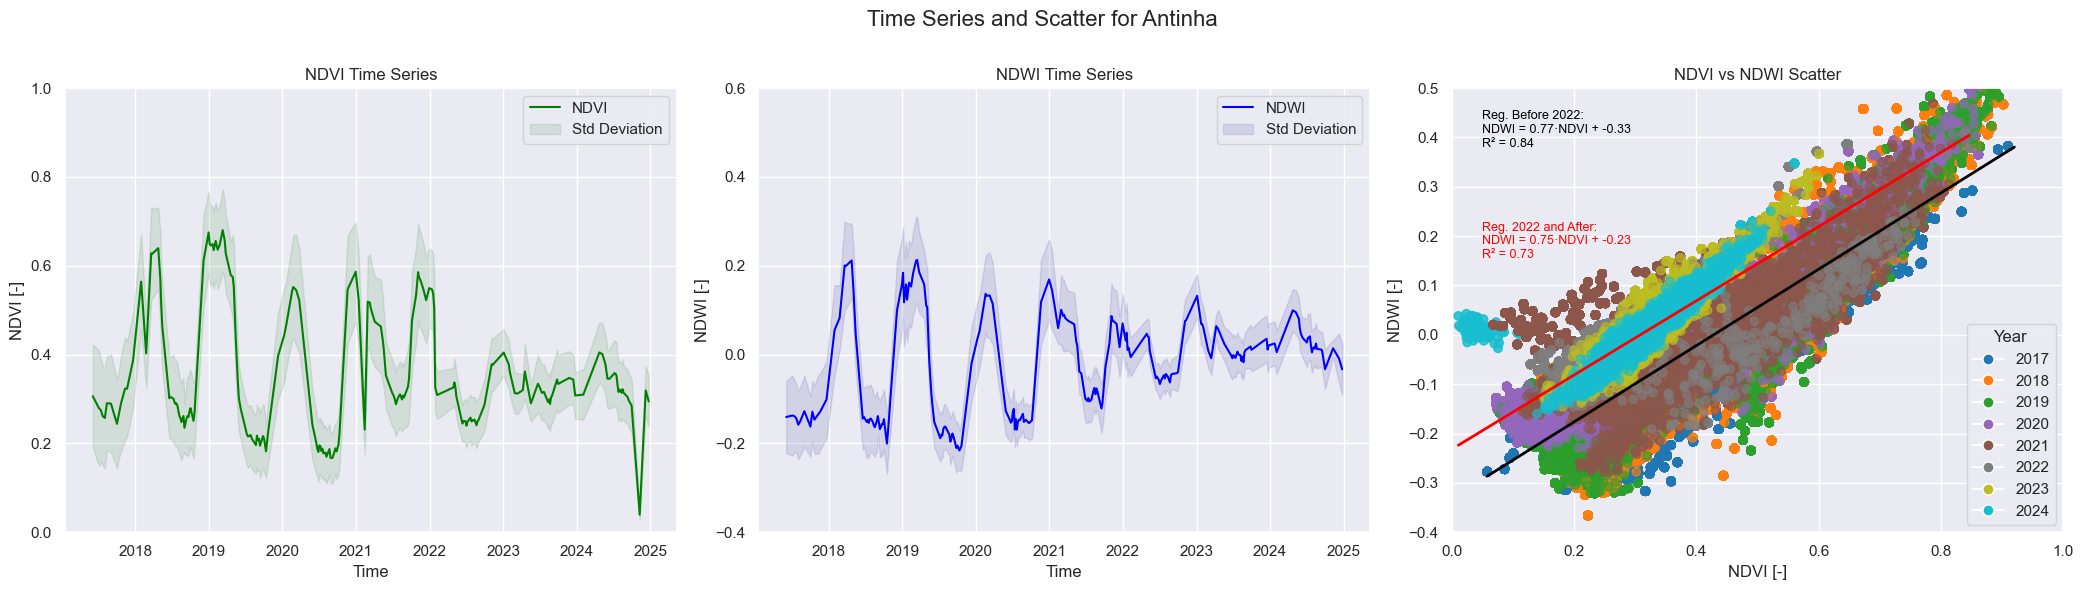

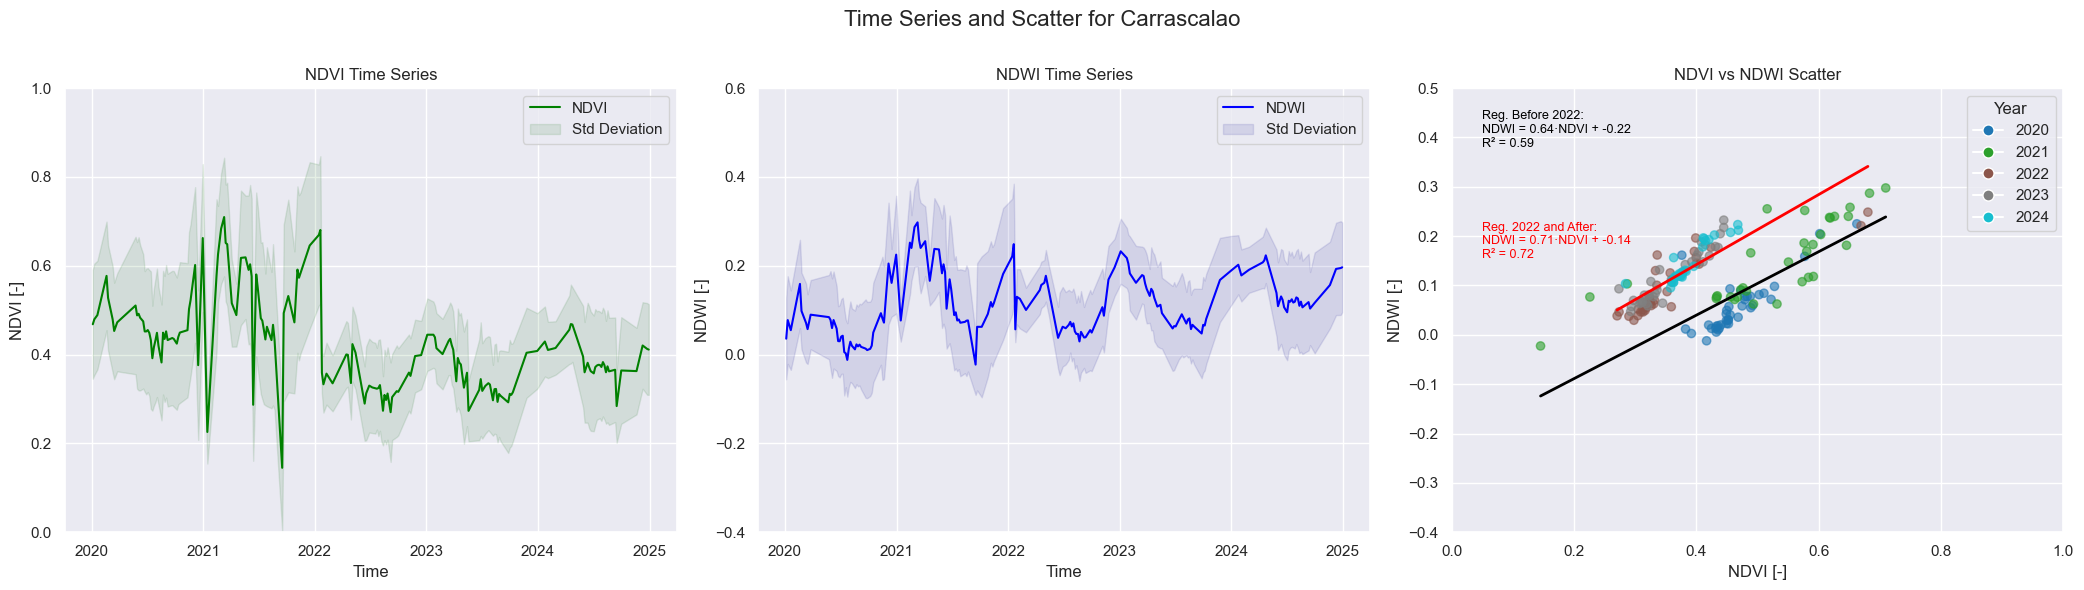

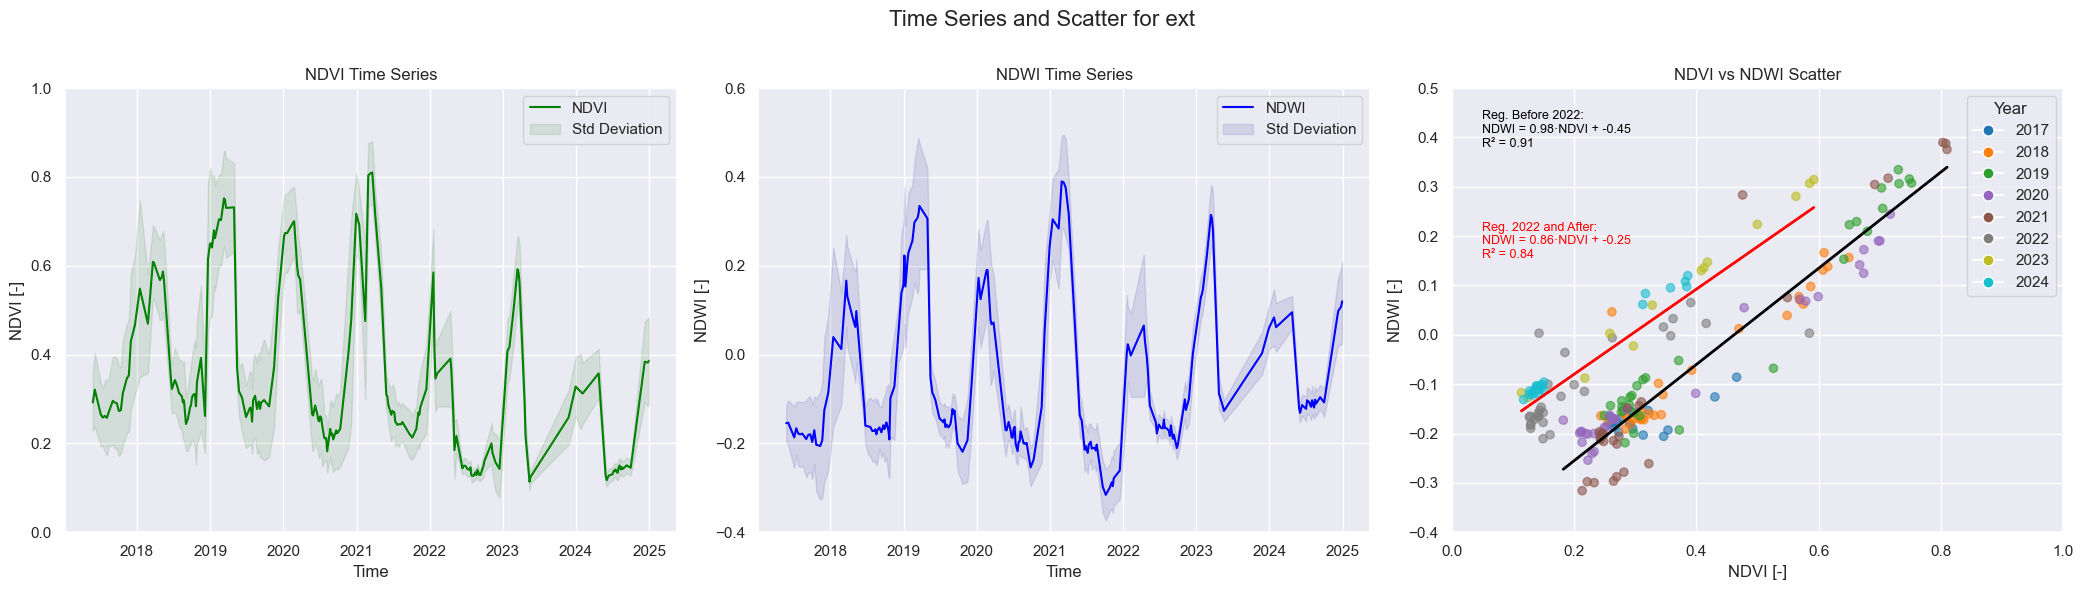

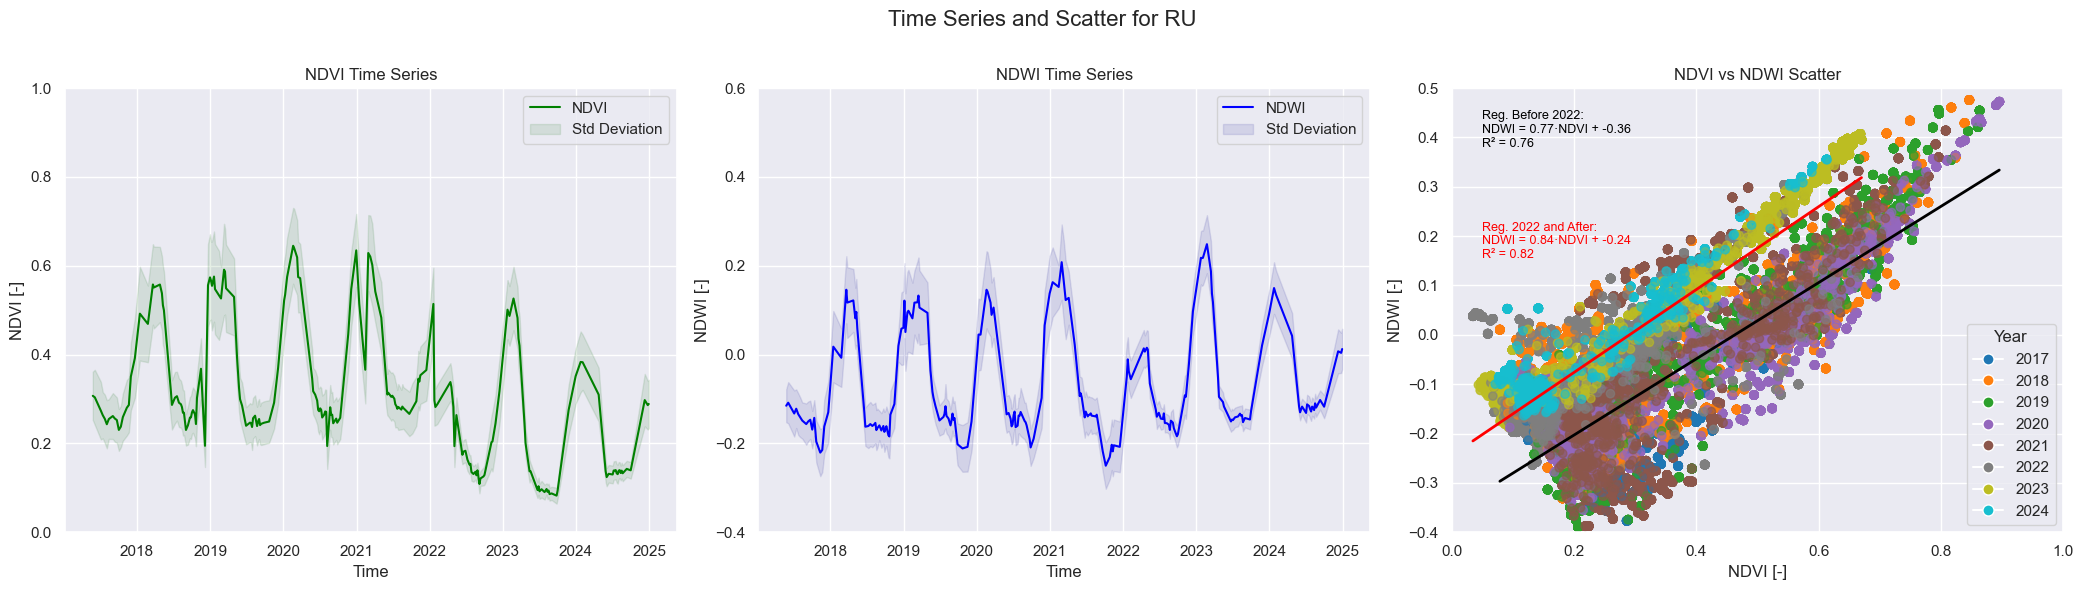

In [12]:
# Plotting time series for each location
for location, files in location_groups.items():
    # Get the full path for both NDVI and NDWI files
    ndvi_file = os.path.join(folder_path, files['NDVI'])
    ndwi_file = os.path.join(folder_path, files['NDWI'])
    
    # Load both CSVs into DataFrames
    df_ndvi = pd.read_csv(ndvi_file, index_col='date')
    df_ndwi = pd.read_csv(ndwi_file, index_col='date')

    
    # Ensure the 'time' column is in datetime format
    df_ndvi.index = pd.to_datetime(df_ndvi.index)
    df_ndwi.index = pd.to_datetime(df_ndwi.index)

    # Filter out rows where NDVI < 0.1 using df_ndvi's index
    valid_ndvi_mask = df_ndvi['NDVI_mean'] >= 0.1
    valid_index = df_ndvi[valid_ndvi_mask].index

    # Apply the index mask to both DataFrames
    df_ndvi= df_ndvi.loc[valid_index]
    df_ndwi = df_ndwi.loc[valid_index]

    # Group by date and compute the mean across all features
    df_ndvi_daily = df_ndvi.groupby(df_ndvi.index).agg({
        'NDVI_mean': 'mean',
        'NDVI_stdDev': 'mean'  # average of stdDev across features
    })

    df_ndwi_daily = df_ndwi.groupby(df_ndwi.index).agg({
    'NDWI_mean': 'mean',
    'NDWI_stdDev': 'mean'
    })

    # Extract year from index
    years = df_ndvi.index.year

    # Generate a colormap (one color per year)
    unique_years = sorted(years.unique())
    cmap = plt.get_cmap('tab10', len(unique_years))  # Or use 'viridis', 'plasma', etc.
    year_to_color = {year: cmap(i) for i, year in enumerate(unique_years)}
    
    # Map colors based on year
    colors = [year_to_color[year] for year in years]

    # Create a figure with two subplots (one for NDVI and one for NDWI)
    fig, axes = plt.subplots(1, 3, figsize=(21, 6))
    fig.suptitle(f'Time Series and Scatter for {location}', fontsize=16)
    
    # Plot NDVI
    axes[0].plot(df_ndvi_daily.index, df_ndvi_daily['NDVI_mean'].values, label='NDVI', color='green')
    axes[0].fill_between(df_ndvi_daily.index, df_ndvi_daily["NDVI_mean"] - df_ndvi_daily["NDVI_stdDev"], df_ndvi_daily["NDVI_mean"] + df_ndvi_daily["NDVI_stdDev"], color='darkgreen', alpha=0.1, label='Std Deviation')
    axes[0].set_title('NDVI Time Series')
    axes[0].set_xlabel('Time')
    axes[0].set_ylim(0,1)
    axes[0].set_ylabel('NDVI [-]')
    axes[0].legend()
    
    # Plot NDWI
    axes[1].plot(df_ndwi_daily.index, df_ndwi_daily['NDWI_mean'].values, label='NDWI', color='blue')
    axes[1].fill_between(df_ndwi_daily.index, df_ndwi_daily["NDWI_mean"] - df_ndwi_daily["NDWI_stdDev"], df_ndwi_daily["NDWI_mean"] + df_ndwi_daily["NDWI_stdDev"], color='darkblue', alpha=0.1, label='Std Deviation')
    axes[1].set_title('NDWI Time Series')
    axes[1].set_xlabel('Time')
    axes[1].set_ylim(-0.4,0.6)
    axes[1].set_ylabel('NDWI [-]')
    axes[1].legend()

    # Scatter plot NDVI vs NDWI
    axes[2].scatter(df_ndvi['NDVI_mean'].values, df_ndwi['NDWI_mean'].values, color=colors, alpha=0.6)
    axes[2].set_title('NDVI vs NDWI Scatter')
    axes[2].set_xlabel('NDVI [-]')
    axes[2].set_xlim(0,1)
    axes[2].set_ylim(-0.4,0.5)
    axes[2].set_ylabel('NDWI [-]')
    axes[2].grid(True)
    
    # Combine NDVI and NDWI data into one DataFrame (index already datetime)
    df_combined = pd.DataFrame({
        'NDVI_mean': df_ndvi['NDVI_mean'],
        'NDWI_mean': df_ndwi['NDWI_mean']
    }).dropna()

    # Split into before and after 2022
    df_before_2022 = df_combined[df_combined.index.year < 2022]
    df_after_2022 = df_combined[df_combined.index.year >= 2022]

    # Plot regression lines
    plot_regression_line(df_before_2022, axes[2], 'black', 'Reg. Before 2022', y_offset=0.95, poly_order=1)
    plot_regression_line(df_after_2022, axes[2], 'red', 'Reg. 2022 and After', y_offset=0.70, poly_order=1)

    # Optional: switch to polynomial by setting poly_order=2
    # plot_regression_line(df_before_2022, axes[2], 'black', 'Poly. Before 2022', y_offset=0.95, poly_order=2)
    # plot_regression_line(df_after_2022, axes[2], 'red', 'Poly. 2022 and After', y_offset=0.70, poly_order=2)


    
    # Create a legend for years
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=str(year),
                        markerfacecolor=year_to_color[year], markersize=8)
            for year in unique_years]
    axes[2].legend(handles=handles, title="Year")

    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust the title to avoid overlap
    plt.show()

* NDVI Time Series are not similar to Vera Cruz → Peak around new year/beginning of year → after a conversation with Arbo-Innova: the plantations are young in Arbo-Innova (planted 2023), before this time you most probably look at pasture. 
* Carrascalao very different --> This is an Olive Orchard
* In all NDWI going up after 2022 in lows, most prominent in RU Fortes --> could be poor drainage due to land preparation but can also be multiple things (Keep in back of mind)


In [6]:
# to pick it up fast where you left
df_trial_hist_veg = pd.read_csv(os.path.join('Data\\extended\\','NDVI_TimeSeries_PerFeature_ext_vc2.csv'), index_col=7, header=0)
df_trial_hist_veg.index = pd.to_datetime(df_trial_hist_veg.index)

# Select years after planting
df_trial_hist_veg = df_trial_hist_veg['2021-01-01':'2025-01-01']

print(df_trial_hist_veg.head())

                                                 system:index  NDVI_max  \
date                                                                      
2021-01-14  00000000000000000000_20210114T112431_20210114T...  0.642643   
2021-02-13  00000000000000000000_20210213T112151_20210213T...  0.652525   
2021-02-28  00000000000000000000_20210228T112109_20210228T...  0.655061   
2021-03-10  00000000000000000000_20210310T112119_20210310T...  0.671858   
2021-03-15  00000000000000000000_20210315T112111_20210315T...  0.668761   

            NDVI_mean  NDVI_median  NDVI_min  NDVI_pixelCount  NDVI_stdDev  \
date                                                                         
2021-01-14   0.388690     0.377957  0.203499             2100     0.080451   
2021-02-13   0.381949     0.364487  0.186005             2100     0.086734   
2021-02-28   0.369427     0.366210  0.199507             2100     0.087268   
2021-03-10   0.380642     0.370180  0.187431             2100     0.093171   
2021-0

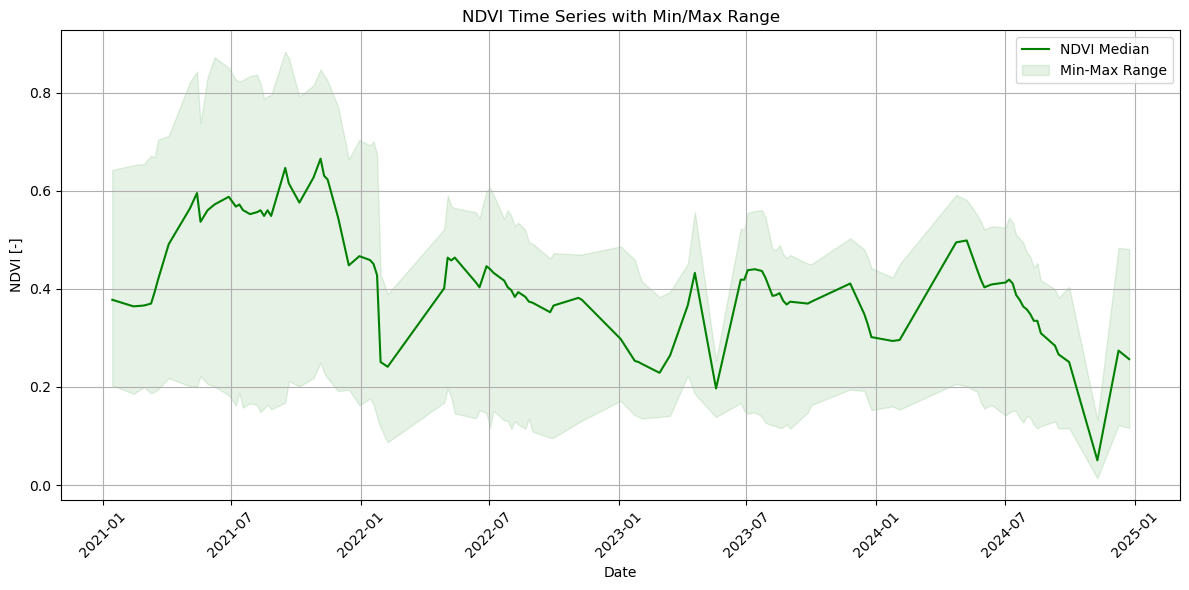

In [7]:
# Group by date and compute the mean across all features
df_trial_hist_veg = df_trial_hist_veg.groupby(df_trial_hist_veg.index).agg({
     'NDVI_mean': 'mean',
     'NDVI_stdDev': 'mean',
     'NDVI_median': 'mean',
     'NDVI_min': 'mean',
     'NDVI_max': 'mean' # average of stdDev across features
 })


# === Plot NDVI time series with min/max around median ===
plt.figure(figsize=(12, 6))
plt.plot(df_trial_hist_veg.index, df_trial_hist_veg['NDVI_median'], color='green', label='NDVI Median')

# Fill between min and max
plt.fill_between(df_trial_hist_veg.index, df_trial_hist_veg['NDVI_min'], df_trial_hist_veg['NDVI_max'], color='green', alpha=0.1, label='Min-Max Range')

# Labels and legend
plt.title('NDVI Time Series with Min/Max Range')
plt.xlabel('Date')
plt.ylabel('NDVI [-]')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# === Show plot ===
plt.show()

#### Duck River Antinha

[Duck River's orchard Antinha](https://www.duckriveragriculture.com/beira-baixa) around 506 hectares and planted in 2019-2020. Interesting to see the shift visible in the NDVI and the high lows in winter the first years.

In [8]:
df_trial_hist_veg['year'] = df_trial_hist_veg.index.year
df_trial_hist_veg['DOY'] = df_trial_hist_veg.index.dayofyear

# === Group by year and DOY ===
pivot = df_trial_hist_veg.pivot_table(index='DOY', columns='year', values='NDVI_median')

# === Compute average NDVI per DOY ===
pivot['Average'] = pivot.mean(axis=1)#.rolling(10) #, skipna=True
pivot['Rolling Average'] = pivot['Average'].rolling(10).mean()

lst_years =list(pivot.columns.values)
print(lst_years)
count = pivot.count(axis=0)
print(count)

n_observations = pd.DataFrame(data=count[:-2]) #, columns=lst_years[:-2]
n_observations 


[2021, 2022, 2023, 2024, 'Average', 'Rolling Average']
year
2021               32
2022               26
2023               27
2024               25
Average            59
Rolling Average    50
dtype: int64


,0
year,
2021,32
2022,26
2023,27
2024,25


Index: 0, Year: 2021
2021
Index: 1, Year: 2022
2022
Index: 2, Year: 2023
2023
Index: 3, Year: 2024
2024


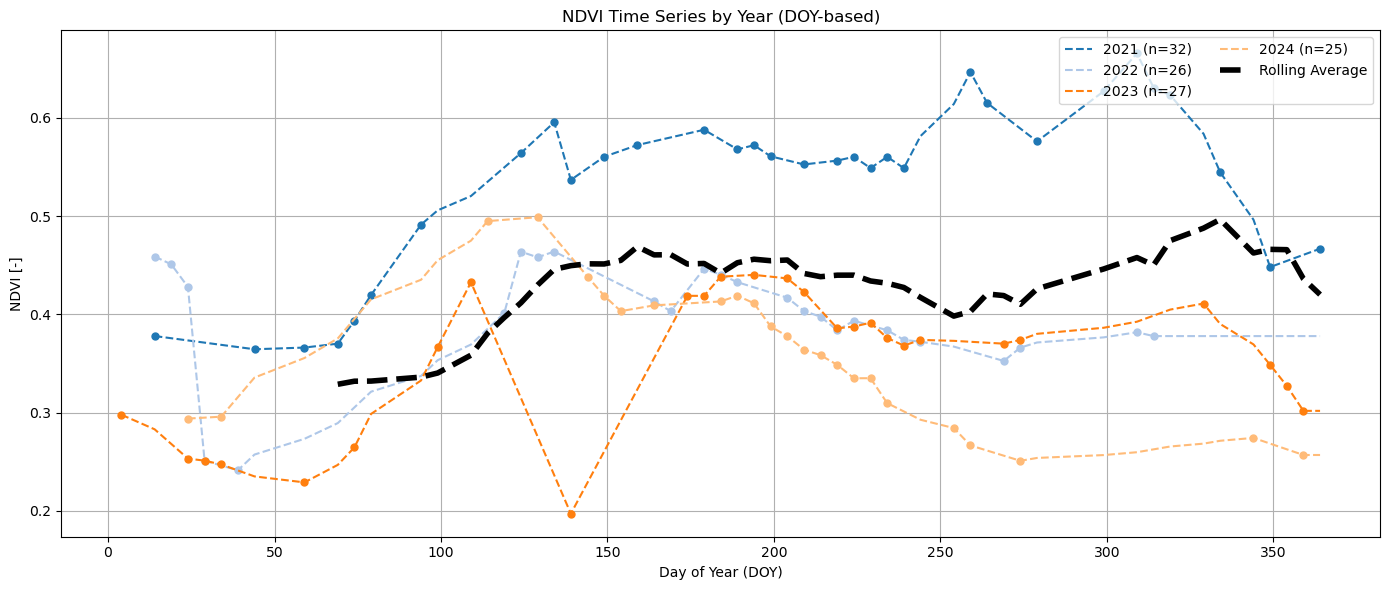

In [13]:
import numpy as np

# === Plot ===
plt.figure(figsize=(14, 6))
colors = plt.cm.tab20(range(7))

pivot[pivot < 0.1] = np.nan #taking away the most obvious cloudy observations
# print(pivot)

# Plot each year
for i, year in enumerate(pivot.columns[:-2]):
    print(f"Index: {i}, Year: {year}")

    print(year)
    data = pivot[year].interpolate() #method='polynomial', order=1
    
    label = f"{year} (n={n_observations.loc[year].item()})"
    plt.plot(pivot.index, data, ls='--', linewidth=1.5, color=colors[i], label=label)
    plt.plot(pivot.index, pivot[year], ls='', marker='o', markersize=5, color=colors[i], label='') # 

# Plot average line
plt.plot(pivot.index, pivot['Rolling Average'], label='Rolling Average', color='black', linewidth=4, linestyle='--')

# === Format plot ===
plt.title('NDVI Time Series by Year (DOY-based)')
plt.xlabel('Day of Year (DOY)')
plt.ylabel('NDVI [-]')
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


Due to the amount of new plantations in Portugal it is not advised to benchmark on field history, but create a regional reference to benchmark a field under almond production. Though for older plantations it can be interesting to visualize the field history and compare years.

## How to continue with Quantifying Orchard Resilience?
* More analysis needed on the vegetation signal for Almond: how different varieties and management affect the signal?
* Get or create ARD NDVI and NDWI
* Check other vegetation indices for usefulness (think of NDGI, EVI; perhaps Sentinel-1 CR)
* Check other options for NRT Soil moisture (I think coarse resolution is what we need for now https://www.wri.org/aqueduct)
* Identify together with partners which period is vital for the almond orchards in order to correctly quantify orchard resilience
* Get ground data from Arbo-Innova 
* To benchmark a certain field should happen on a regional level of bearing orchards and not field history (many young plantations) 
* During this exercise we came to the conclusion it will be very important to correct for Planting year and only include bearing orchards; remove first few (three?) years in analysis
